# Module 2 - Introduction to Forecasting with __Python__

## Introduction

In the first lecture, a simple linear model of the type


$log(F_{gdp}) = c + log(A_{gdp})$

is estimated, visualized, and briefly analyzed. Let's see how to do it in Python using `statsmodels`.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.formula.api as fsm
import statsmodels.api as sm

In [2]:
df = pd.read_csv("data/Module_2_Fiji_fiji.csv")
df.head()

,Date,RGDP_FIJI,G_REAL_GROWTH_FIJI,RGDP_AUS,G_REAL_GROWTH_AUS,REER_FIJI,SUGAROUTPUT_FIJI,G_SUGAR_OUTPUT,SUGAROUTPUT_FIJI_MISSING
0,1970.0,1.6316,NaN,406.2,NaN,NaN,NaN,NaN,NaN
1,1971.0,1.7436,6.864428,421.7,3.815854,NaN,NaN,NaN,NaN
2,1972.0,1.8744,7.501721,429.7,1.897083,NaN,NaN,NaN,NaN
3,1973.0,2.0921,11.614383,451.4,5.050035,NaN,NaN,NaN,NaN
4,1974.0,2.1453,2.542899,458.0,1.462118,NaN,NaN,NaN,NaN


Let's do some precleaning to keep only `date`, `rgdp_fiji`, and `rgdp_aus`.

In [3]:
df.columns = [x.lower() for x in df.columns]
df = df[["date", "rgdp_fiji", "rgdp_aus"]]
df.head()

,date,rgdp_fiji,rgdp_aus
0,1970.0,1.6316,406.2
1,1971.0,1.7436,421.7
2,1972.0,1.8744,429.7
3,1973.0,2.0921,451.4
4,1974.0,2.1453,458.0


In [12]:
# Transform into logs:
df = (df
    .assign(
        log_rgdp_fiji=np.log(df.rgdp_fiji),
        log_rgdp_aus=np.log(df.rgdp_aus)
    )
    .dropna()
)

In [14]:
X = df.log_rgdp_aus
X = sm.add_constant(X)
Y = df.log_rgdp_fiji
model = sm.OLS(Y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          log_rgdp_fiji   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     1867.
Date:                Thu, 14 Oct 2021   Prob (F-statistic):           1.92e-36
Time:                        09:04:19   Log-Likelihood:                 70.269
No. Observations:                  44   AIC:                            -136.5
Df Residuals:                      42   BIC:                            -133.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.1952      0.124    -33.878      0.000      -4.445      -3.945
log_rgdp_aus     0.8010      0.019     43.208      0.000       0.764       0.838
==============================================================================
Omnibus:                        4.947   Durbin-Watson:                   0.687
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                4.232
Skew:                          -0.758   Prob(JB):                        0.121
Kurtosis:                       3.105   Cond. No.                         112.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To finish with the introduction, let's plot the dependent variable, the predicted values, and the residuals:

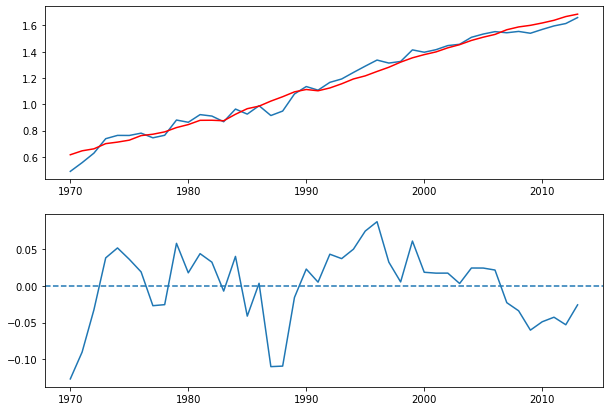

In [31]:
fig, ax = plt.subplots(2, figsize=(10, 7))

ax[0].plot(df.date, Y)
ax[0].plot(df.date, results.predict(), color="r");

ax[1].plot(df.date, results.resid)
ax[1].axhline(0, ls='--');
